In [1]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
from scipy import signal as sps
import seaborn as sns
import glob
import re
from scipy.optimize import curve_fit

In [2]:
names=['Plane','Time','Elapsed (ms)']
df=pd.read_table('C:\\Users\Annie\Desktop\\160621_1_Notepad\\20.txt',skiprows=4)
names.extend([col for col in df.columns if 'G PMT' in col])
df=df.loc[df.Plane != 0,df.columns.isin(names)]
# # odf is the original dataframe, only G PMT columns in this dataframe
odf=df[[col for col in df.columns if 'G PMT' in col]]

In [3]:
os.chdir('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\160321_2')
for filename in glob.glob('*.txt'):
    df=pd.read_table(filename,skiprows=4)
    odf=df[[col for col in df.columns if 'G PMT' in col]]
    # dff is DF/F for every cell
    base=[];
    for col in odf.columns:
        value=odf.loc[2:23,col].mean();
        base.append(value)
    base=pd.DataFrame(base).T
    base.columns=odf.columns
    # base
    dff=[];
    for col in odf.columns:
        value=(odf[col]-np.asscalar(base[col]))/np.asscalar(base[col])
        dff.append(value)
    dff=pd.DataFrame(dff).T
    # detrend
    dt=[];
    firsta=1;
    firstb=20;
    lasta=130
    lastb=174
    for col in dff.columns:
        firstvalues=pd.DataFrame([np.arange(firsta,firstb+1,1),dff.loc[firsta:firstb,col]]).T
        lastvalues=pd.DataFrame([np.arange(lasta,lastb+1,1),dff.loc[lasta:lastb,col]]).T
        temp=firstvalues.append(lastvalues)
        fitline=np.polyfit(temp[0],temp[1],2)
        tmp=np.poly1d(fitline)
        fitvalues=tmp(np.arange(len(dff[col])))
        detrended=np.subtract(dff[col],fitvalues)
        dt.append(detrended)
    dt=pd.DataFrame(dt).T
#     dt.to_csv(filename.split('.')[0]+'dt.txt')

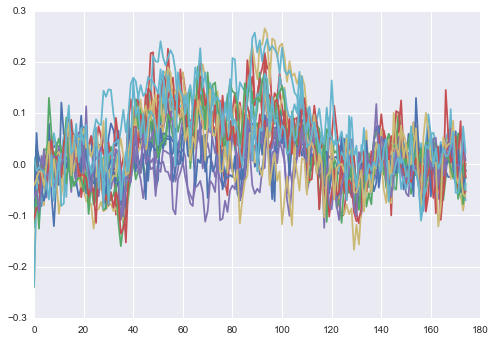

In [4]:
test=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\160321_1\\21dt.txt')
test=test[[col for col in test.columns if 'G PMT' in col]]
plt.plot(test);

# Do this fit on all of the cells from one trial

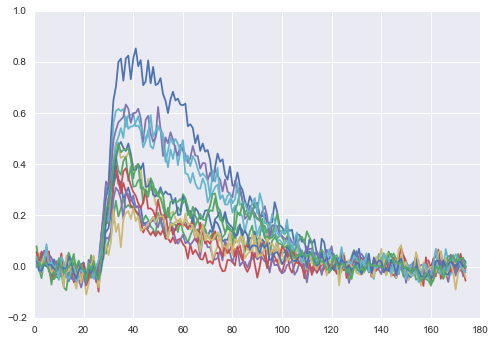

In [3]:
# dff is DF/F for every cell
base=[];
for col in odf.columns:
    value=odf.loc[2:23,col].mean();
    base.append(value)
base=pd.DataFrame(base).T
base.columns=odf.columns
# base
dff=[];
for col in odf.columns:
    value=(odf[col]-np.asscalar(base[col]))/np.asscalar(base[col])
    dff.append(value)
dff=pd.DataFrame(dff).T
# detrend
dt=[];
firsta=1;
firstb=20;
lasta=130
lastb=174
for col in dff.columns:
    firstvalues=pd.DataFrame([np.arange(firsta,firstb+1,1),dff.loc[firsta:firstb,col]]).T
    lastvalues=pd.DataFrame([np.arange(lasta,lastb+1,1),dff.loc[lasta:lastb,col]]).T
    temp=firstvalues.append(lastvalues)
    fitline=np.polyfit(temp[0],temp[1],2)
    tmp=np.poly1d(fitline)
    fitvalues=tmp(np.arange(len(dff[col])))
    detrended=np.subtract(dff[col],fitvalues)
    dt.append(detrended)
dt=pd.DataFrame(dt).T
plt.plot(dt);

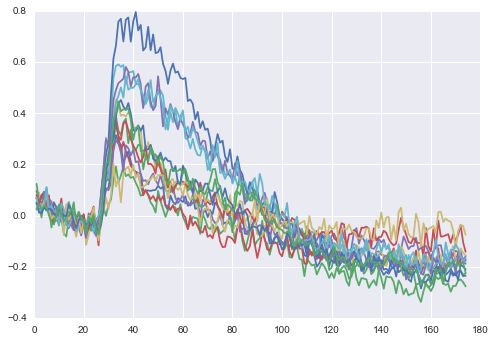

In [6]:
plt.plot(dff);

# Testing

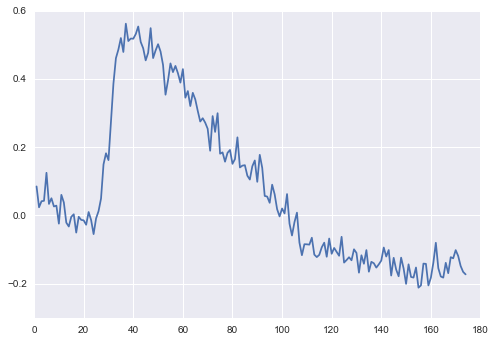

In [24]:
# Divided is DF/F for first column
baseline=pd.DataFrame(odf.iloc[5:26,11]).mean();
example=pd.DataFrame(odf.iloc[:,11]);
temp=example.subtract(baseline);
divided=temp.divide(baseline);
plt.figure();
plt.plot(divided);

In [25]:
#Get the values of the first and last part
dt=divided.iloc[:,0];
# plt.plot(dt);
first=[np.arange(1,20,1),divided.iloc[1:20,0]];
# plt.plot(first[1]);
last=[np.arange(130,174,1),divided.iloc[130:174,0]];
# plt.plot(last[1]);
firstdf=pd.DataFrame(first).T
lastdf=pd.DataFrame(last).T

In [26]:
#Make a fit line
temp=firstdf.append(lastdf)
fitline=np.polyfit(temp[0],temp[1],2);
tmp=np.poly1d(fitline)
# plt.plot(tmp(np.arange(len(dt))));
# plt.plot(temp[0],temp[1]);

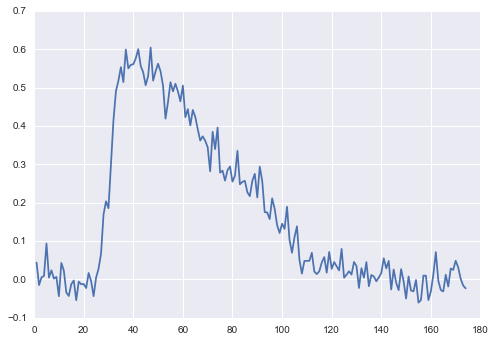

In [27]:
#Get dtrended values
fitvalues=tmp(np.arange(len(dt)))
detrended=np.subtract(dt,fitvalues)
plt.plot(detrended);
# plt.plot(dt);

In [16]:
temp=firstdf.append(lastdf)
def model_func(x,a,k,b):
    return a*np.exp(-k*x)+b

y=np.array(temp.iloc[:,1])
x=np.array(temp.iloc[:,0])

#curve fit
p0=(1.,1.e-5,1.)
opt,pcov=curve_fit(model_func,x,y,p0)
a,k,b=opt

#plot
x2=np.linspace(0,180,2)
y2=model_func(x2,a,k,b)
# plt.plot(x2,y2);
# plt.plot(x,y);

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.